In [6]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [8]:
# Load the CSV into a DataFrame
df = pd.read_csv('/Users/nieveenalia/Downloads/archive/accepted_2007_to_2018Q4.csv.gz')


/var/folders/sk/b78939dn5gl3hcdmrc96lm480000gn/T/ipykernel_61235/2633312995.py:2: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/nieveenalia/Downloads/archive/accepted_2007_to_2018Q4.csv.gz')


In [9]:

# Show the first 5 rows to confirm it worked
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
columns_to_keep = [ 
    'loan_amnt',
    'term',
    'int_rate',
    'installment',
    'grade',
    'sub_grade',
    'emp_length',
    'home_ownership',
    'annual_inc',
    'purpose',
    'dti',
    'loan_status' 
]
    

In [13]:
df = df[columns_to_keep]
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,purpose,dti,loan_status
0,3600.0,36 months,13.99,123.03,C,C4,10+ years,MORTGAGE,55000.0,debt_consolidation,5.91,Fully Paid
1,24700.0,36 months,11.99,820.28,C,C1,10+ years,MORTGAGE,65000.0,small_business,16.06,Fully Paid
2,20000.0,60 months,10.78,432.66,B,B4,10+ years,MORTGAGE,63000.0,home_improvement,10.78,Fully Paid
3,35000.0,60 months,14.85,829.90,C,C5,10+ years,MORTGAGE,110000.0,debt_consolidation,17.06,Current
4,10400.0,60 months,22.45,289.91,F,F1,3 years,MORTGAGE,104433.0,major_purchase,25.37,Fully Paid


In [27]:
# Keep only loans are either Fully Piad or Charged off 
df = df[df['loan_status'].isin(['Fully Paid', 'Charged Off', 'Default'])] 

#Create the target column, check each loan status and return 1 or 0 if it defaulted 

df['target'] = df['loan_status'].apply(lambda x: 1 if x in ['Charged Off', 'Default'] else 0) 

# Double check if it worked 

df[['loan_status', 'target']].head(10)                                        

/var/folders/sk/b78939dn5gl3hcdmrc96lm480000gn/T/ipykernel_61235/4064735889.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = df['loan_status'].apply(lambda x: 1 if x in ['Charged Off', 'Default'] else 0)


,loan_status,target
0,Fully Paid,0
1,Fully Paid,0
2,Fully Paid,0
4,Fully Paid,0
5,Fully Paid,0
6,Fully Paid,0
7,Fully Paid,0
8,Fully Paid,0
9,Fully Paid,0
12,Fully Paid,0


In [15]:
# Step 1: Drop rows where 'term' is missing
df = df[df['term'].notna()]


In [17]:
# Step 2: Remove ' months' and convert to integer
df['term'] = df['term'].str.replace(' months', '').astype(int)

In [19]:
df['emp_length'] = df['emp_length'].replace({
    '10+ years': 10, '9 years': 9, '8 years': 8, '7 years': 7,
    '6 years': 6, '5 years': 5, '4 years': 4, '3 years': 3,
    '2 years': 2, '1 year': 1, '< 1 year': 0.5, 'n/a': 0
})

/var/folders/sk/b78939dn5gl3hcdmrc96lm480000gn/T/ipykernel_61235/1878727021.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['emp_length'] = df['emp_length'].replace({


In [21]:
df[['term', 'emp_length']].head()


,term,emp_length
0,36,10.0
1,36,10.0
2,60,10.0
3,60,10.0
4,60,3.0


In [31]:
import matplotlib.pyplot as plt 
import seaborn as sns

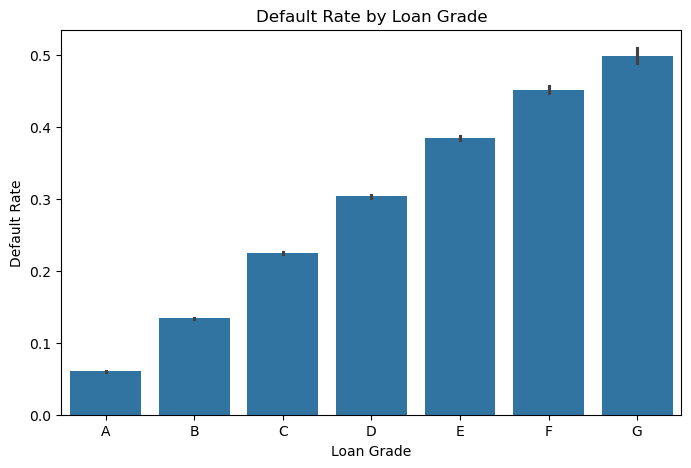

In [32]:
plt.figure(figsize=(8, 5))
sns.barplot(
    x='grade',
    y='target',
    data=df,
    estimator=lambda x: sum(x) / len(x),  # % of defaults
    order=sorted(df['grade'].dropna().unique())  # keep A to G order
)

plt.title('Default Rate by Loan Grade')
plt.ylabel('Default Rate')
plt.xlabel('Loan Grade')


# This shows:Each grade (A–G) on the x-axis.The proportion of loans that defaulted (target = 1) on the y-axis.


In [34]:
plt.show()

Text(0.5, 0, 'Loan Purpose')

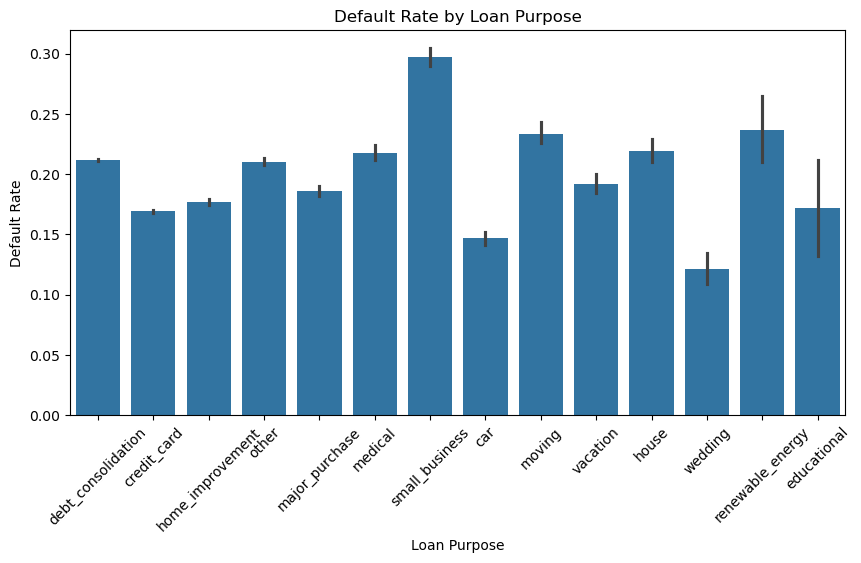

In [37]:
# Default Rate by Loan Purpose. This shows what the loan was used for like debt consolidations etc. and how that affects default risk 

plt.figure(figsize=(10, 5))
sns.barplot(
    x='purpose',
    y='target',
    data=df,
    estimator=lambda x: sum(x) / len(x),
    order=df['purpose'].value_counts().index  # most common first
)

plt.xticks(rotation=45)
plt.title('Default Rate by Loan Purpose')
plt.ylabel('Default Rate')
plt.xlabel('Loan Purpose')


In [38]:
plt.show()

Text(0.5, 0, 'Employment Length (years)')

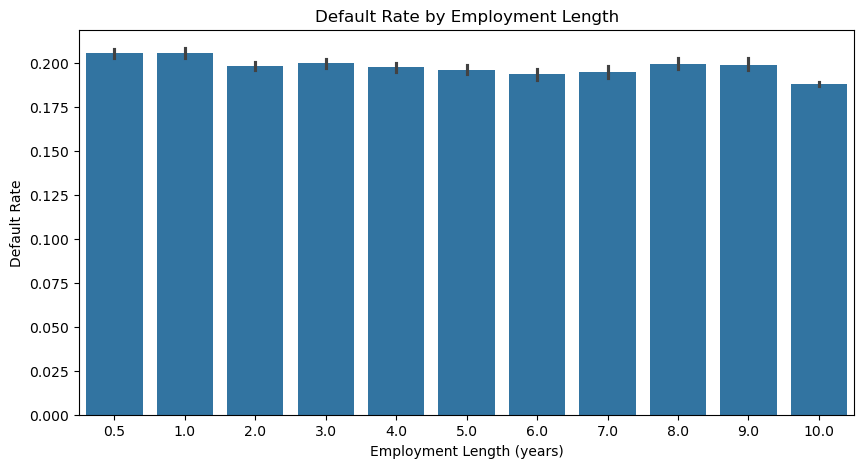

In [41]:
# Deafault Rate by Employment Length. Borrowers who've worked longer may be more stable, let take a look: 


plt.figure(figsize=(10, 5))
sns.barplot(
    x='emp_length',
    y='target',
    data=df,
    estimator=lambda x: sum(x) / len(x),
    order=sorted(df['emp_length'].dropna().unique())  # ensures order 0 → 10
)

plt.title('Default Rate by Employment Length')
plt.ylabel('Default Rate')
plt.xlabel('Employment Length (years)')


In [42]:
plt.show()

In [ ]:
# Employment legth doesn't significantly affect the default risk. 

In [45]:
# Step 1: Drop rows with missing values in key columns
df_model = df.dropna(subset=['emp_length', 'annual_inc', 'dti'])

In [53]:
# Step 2: Select features for the model
features = [
    'loan_amnt', 'term', 'int_rate', 'installment',
    'emp_length', 'annual_inc', 'dti',
    'grade', 'home_ownership', 'purpose'
]

In [55]:
# Step 3: One-hot encode categorical columns
df_encoded = pd.get_dummies(df_model[features], drop_first=True)

In [58]:
# Step 4: Set up X (features) and y (target)
X = df_encoded
y = df_model['target']

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [63]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [65]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # for probability scores

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print(classification_report(y_test, y_pred))


Accuracy: 0.8003373275866605
ROC AUC: 0.669965314373293
              precision    recall  f1-score   support

           0       0.81      0.99      0.89    305520
           1       0.40      0.04      0.07     74526

    accuracy                           0.80    380046
   macro avg       0.60      0.51      0.48    380046
weighted avg       0.73      0.80      0.73    380046



In [67]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [68]:
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]  # probability of class 1 (default)


In [71]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest ROC AUC:", roc_auc_score(y_test, y_proba_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.7984296637775428
Random Forest ROC AUC: 0.6766658386747458
              precision    recall  f1-score   support

           0       0.82      0.97      0.89    305520
           1       0.44      0.10      0.17     74526

    accuracy                           0.80    380046
   macro avg       0.63      0.54      0.53    380046
weighted avg       0.74      0.80      0.74    380046



In [74]:
# Copy X_test to a new DataFrame
test_results = X_test.copy()
test_results['actual'] = y_test.values
test_results['predicted_default_proba'] = y_proba_rf

# Add back the interest rate column (scaled if needed)
test_results['int_rate'] = df_model.loc[X_test.index, 'int_rate']


In [76]:
def assign_risk_group(prob):
    if prob < 0.10:
        return 'Low Risk (<10%)'
    elif prob < 0.20:
        return 'Medium Risk (10-20%)'
    else:
        return 'High Risk (20%+)'

test_results['risk_group'] = test_results['predicted_default_proba'].apply(assign_risk_group)


In [78]:
# Expected return = interest rate * (1 - predicted default probability)
test_results['expected_return'] = test_results['int_rate'] * (1 - test_results['predicted_default_proba'])


Text(0.5, 0, 'Risk Group')

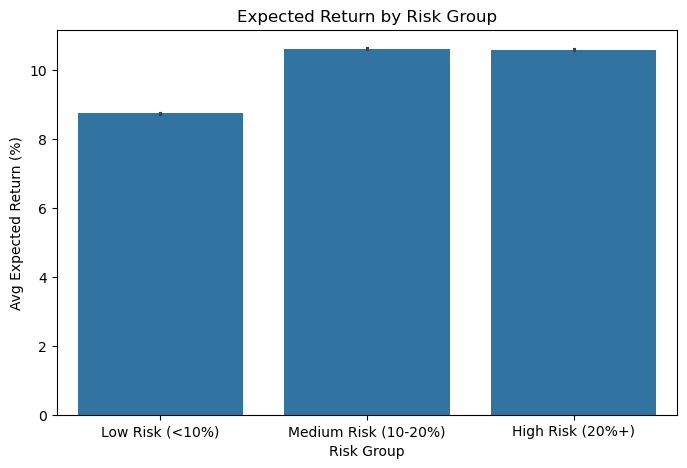

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(data=test_results, x='risk_group', y='expected_return', order=['Low Risk (<10%)', 'Medium Risk (10-20%)', 'High Risk (20%+)'])

plt.title('Expected Return by Risk Group')
plt.ylabel('Avg Expected Return (%)')
plt.xlabel('Risk Group')



In [82]:
plt.show()